In [2]:
import pandas as pd
import os


# Preparing the data.

In [3]:
root = os.path.join("..","Data")
df = pd.read_excel(os.path.join(root, "DEMAND_FILE_PHASE2.xlsx"))
df = df.iloc[0:2].T.reset_index(drop=True)
df.columns = ['Date','Sales']
df.drop(0, inplace=True)
df['Sales'] = df['Sales'].astype('float')
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Sales
1,2020-04-01,27116.257595
2,2020-04-02,28710.388430
3,2020-04-03,30728.165560
4,2020-04-04,31766.156375
5,2020-04-05,24258.566380
...,...,...
1728,2024-12-27,267775.000000
1729,2024-12-28,274362.000000
1730,2024-12-29,244200.000000
1731,2024-12-30,274584.000000


In [4]:
import calendar
def days_in_month(row):
    return calendar.monthrange(row['Year'], row['Month'])[1]

df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfYear'] = df['Date'].dt.dayofyear
df['IsWeekend'] = (df['Weekday'] >= 5).astype(int)
df['DaysInMonth'] = df.apply(days_in_month, axis=1)
df

,Date,Sales,Day,Weekday,Month,Year,DayOfYear,IsWeekend,DaysInMonth
1,2020-04-01,27116.257595,1,2,4,2020,92,0,30
2,2020-04-02,28710.388430,2,3,4,2020,93,0,30
3,2020-04-03,30728.165560,3,4,4,2020,94,0,30
4,2020-04-04,31766.156375,4,5,4,2020,95,1,30
5,2020-04-05,24258.566380,5,6,4,2020,96,1,30
...,...,...,...,...,...,...,...,...,...
1728,2024-12-27,267775.000000,27,4,12,2024,362,0,31
1729,2024-12-28,274362.000000,28,5,12,2024,363,1,31
1730,2024-12-29,244200.000000,29,6,12,2024,364,1,31
1731,2024-12-30,274584.000000,30,0,12,2024,365,0,31


In [5]:
import numpy as np
# Apply Cyclical Encoding
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / df['DaysInMonth'])
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / df['DaysInMonth'])

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

df['Weekday_sin'] = np.sin(2 * np.pi * df['Weekday'] / 7)
df['Weekday_cos'] = np.cos(2 * np.pi * df['Weekday'] / 7)

df['DayOfYear_sin'] = np.sin(2 * np.pi * df['DayOfYear'] / 365)
df['DayOfYear_cos'] = np.cos(2 * np.pi * df['DayOfYear'] / 365)

# Drop raw columns if necessary
df = df.drop(columns=['Weekday', 'Month', 'DayOfYear', 'DaysInMonth','Day','Year'])
df

,Date,Sales,IsWeekend,Day_sin,Day_cos,Month_sin,Month_cos,Weekday_sin,Weekday_cos,DayOfYear_sin,DayOfYear_cos
1,2020-04-01,27116.257595,0,2.079117e-01,0.978148,8.660254e-01,-0.5,0.974928,-0.222521,9.999167e-01,-0.012910
2,2020-04-02,28710.388430,0,4.067366e-01,0.913545,8.660254e-01,-0.5,0.433884,-0.900969,9.995463e-01,-0.030120
3,2020-04-03,30728.165560,0,5.877853e-01,0.809017,8.660254e-01,-0.5,-0.433884,-0.900969,9.988797e-01,-0.047321
4,2020-04-04,31766.156375,1,7.431448e-01,0.669131,8.660254e-01,-0.5,-0.974928,-0.222521,9.979172e-01,-0.064508
5,2020-04-05,24258.566380,1,8.660254e-01,0.500000,8.660254e-01,-0.5,-0.781831,0.623490,9.966589e-01,-0.081676
...,...,...,...,...,...,...,...,...,...,...,...
1728,2024-12-27,267775.000000,0,-7.247928e-01,0.688967,-2.449294e-16,1.0,-0.433884,-0.900969,-5.161967e-02,0.998667
1729,2024-12-28,274362.000000,1,-5.712682e-01,0.820763,-2.449294e-16,1.0,-0.974928,-0.222521,-3.442161e-02,0.999407
1730,2024-12-29,244200.000000,1,-3.943559e-01,0.918958,-2.449294e-16,1.0,-0.781831,0.623490,-1.721336e-02,0.999852
1731,2024-12-30,274584.000000,0,-2.012985e-01,0.979530,-2.449294e-16,1.0,0.000000,1.000000,6.432491e-16,1.000000


In [6]:
df['Sales_MA_7'] = df['Sales'].rolling(window=7).mean().shift(1)  # 7-day moving avg
df = df.dropna().reset_index(drop=True)
df

,Date,Sales,IsWeekend,Day_sin,Day_cos,Month_sin,Month_cos,Weekday_sin,Weekday_cos,DayOfYear_sin,DayOfYear_cos,Sales_MA_7
0,2020-04-08,37042.335435,0,9.945219e-01,-0.104528,8.660254e-01,-0.5,0.974928,-0.222521,9.911141e-01,-0.133015,27235.338575
1,2020-04-09,37964.938745,0,9.510565e-01,-0.309017,8.660254e-01,-0.5,0.433884,-0.900969,9.886776e-01,-0.150055,28653.349695
2,2020-04-10,44276.781385,0,8.660254e-01,-0.500000,8.660254e-01,-0.5,-0.433884,-0.900969,9.859481e-01,-0.167052,29975.428311
3,2020-04-11,47721.269465,1,7.431448e-01,-0.669131,8.660254e-01,-0.5,-0.974928,-0.222521,9.829266e-01,-0.183998,31910.944858
4,2020-04-12,42818.685600,1,5.877853e-01,-0.809017,8.660254e-01,-0.5,-0.781831,0.623490,9.796137e-01,-0.200891,34190.246728
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,2024-12-27,267775.000000,0,-7.247928e-01,0.688967,-2.449294e-16,1.0,-0.433884,-0.900969,-5.161967e-02,0.998667,256319.714286
1721,2024-12-28,274362.000000,1,-5.712682e-01,0.820763,-2.449294e-16,1.0,-0.974928,-0.222521,-3.442161e-02,0.999407,253353.000000
1722,2024-12-29,244200.000000,1,-3.943559e-01,0.918958,-2.449294e-16,1.0,-0.781831,0.623490,-1.721336e-02,0.999852,252778.714286
1723,2024-12-30,274584.000000,0,-2.012985e-01,0.979530,-2.449294e-16,1.0,0.000000,1.000000,6.432491e-16,1.000000,256156.000000


In [24]:
train_df = df[df['Date']<"2024-01-01"].reset_index(drop=True)
test_df = df[(df['Date'] >= "2024-01-01") & (df['Date'] < "2024-02-01")].reset_index(drop=True)
    

In [25]:
test_df

,Date,Sales,IsWeekend,Day_sin,Day_cos,Month_sin,Month_cos,Weekday_sin,Weekday_cos,DayOfYear_sin,DayOfYear_cos,Sales_MA_7
0,2024-01-01,246874.520415,0,2.012985e-01,0.979530,0.5,0.866025,0.000000,1.000000,0.017213,0.999852,262152.121561
1,2024-01-02,237075.740555,0,3.943559e-01,0.918958,0.5,0.866025,0.781831,0.623490,0.034422,0.999407,261049.308766
2,2024-01-03,259423.461100,0,5.712682e-01,0.820763,0.5,0.866025,0.974928,-0.222521,0.051620,0.998667,259903.190231
3,2024-01-04,257254.308940,0,7.247928e-01,0.688967,0.5,0.866025,0.433884,-0.900969,0.068802,0.997630,257996.891864
4,2024-01-05,273096.786780,0,8.486443e-01,0.528964,0.5,0.866025,-0.433884,-0.900969,0.085965,0.996298,256456.457986
5,2024-01-06,261596.673820,1,9.377521e-01,0.347305,0.5,0.866025,-0.974928,-0.222521,0.103102,0.994671,257159.340569
6,2024-01-07,225029.032415,1,9.884683e-01,0.151428,0.5,0.866025,-0.781831,0.623490,0.120208,0.992749,251949.211550
7,2024-01-08,261946.412130,0,9.987165e-01,-0.050649,0.5,0.866025,0.000000,1.000000,0.137279,0.990532,251478.646289
8,2024-01-09,232532.318540,0,9.680771e-01,-0.250653,0.5,0.866025,0.781831,0.623490,0.154309,0.988023,253631.773677
9,2024-01-10,276852.706715,0,8.978045e-01,-0.440394,0.5,0.866025,0.974928,-0.222521,0.171293,0.985220,252982.713389


# Training the model.

In [30]:
prophet_train_df = train_df.copy()
prophet_test_df = test_df.copy()

from prophet import Prophet

model = Prophet()
model.add_country_holidays(country_name='India')
for reg in prophet_train_df.columns[2:]:
  model.add_regressor(reg)

prophet_train_df.rename(columns={'Date':'ds',
                                 'Sales':'y'},inplace=True)
model.fit(prophet_train_df)

c:\Users\milan\Desktop\CDIS Project\.venv\Lib\site-packages\holidays\countries\india.py:180: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)
01:44:50 - cmdstanpy - INFO - Chain [1] start processing
01:44:50 - cmdstanpy - INFO - Chain [1] done processing


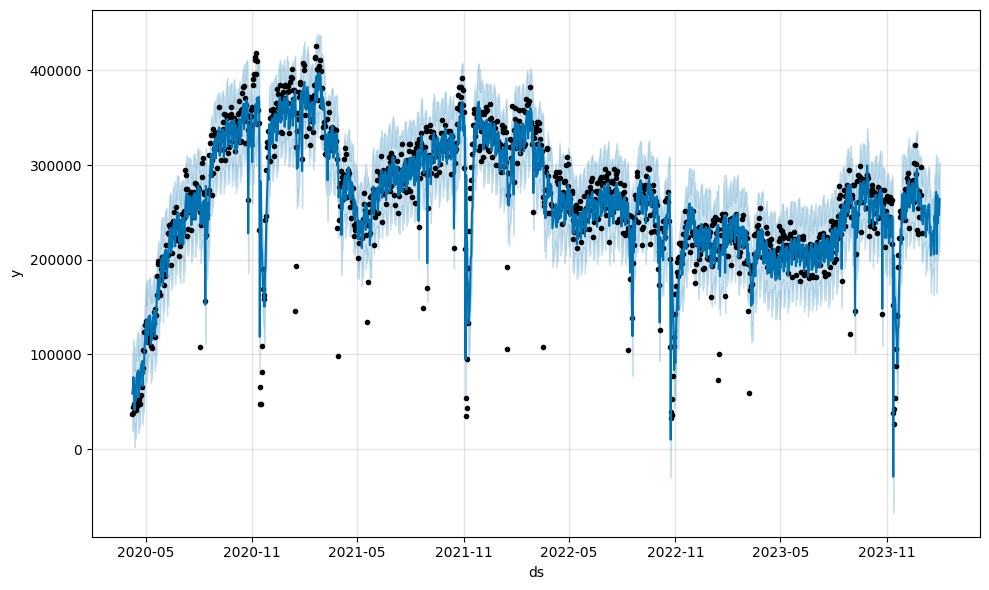

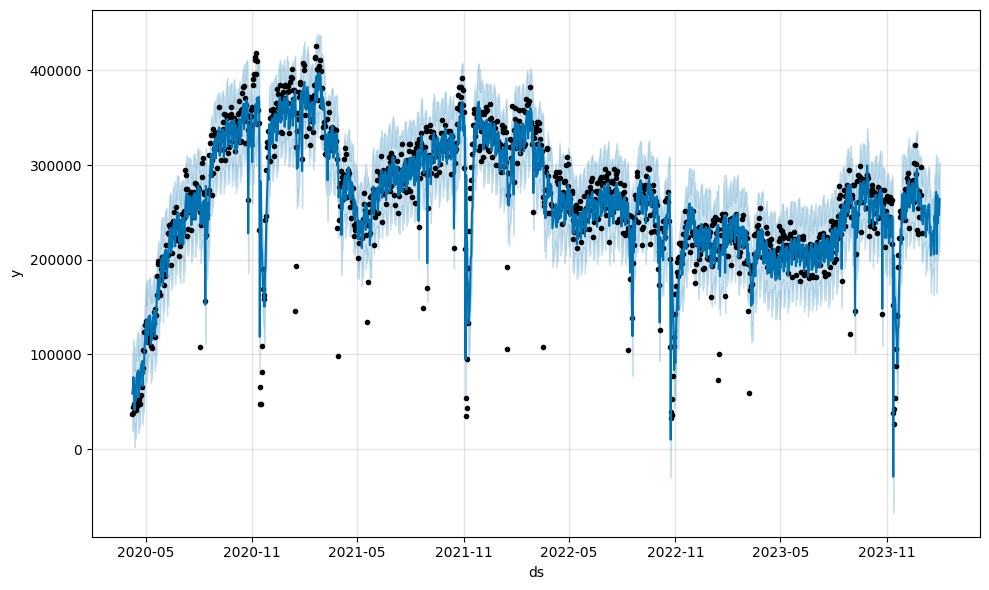

In [31]:
# Create a DataFrame for future dates
future = model.make_future_dataframe(periods=len(prophet_test_df), freq='1D')
for reg in prophet_test_df.columns[2:]:
  future[reg] = prophet_train_df[reg].to_list() + prophet_test_df[reg].to_list()

# Make predictions
forecast = model.predict(future )
# Plot the forecast
model.plot(forecast)

In [32]:
from sklearn.metrics import mean_absolute_error
from sktime.performance_metrics.forecasting import median_absolute_percentage_error, mean_absolute_percentage_error

test_predictions = forecast.iloc[-len(prophet_test_df):]['yhat']
test_actual = prophet_test_df['Sales']

# Calculate MAE
mae = mean_absolute_percentage_error(test_actual, test_predictions)
median_absolute_percentage_error = median_absolute_percentage_error(test_actual, test_predictions)
print(f"Mean Absolute Percentage Error (MAE): {mae}")
print(f"Median Absolute Percentage Error: {median_absolute_percentage_error}")

Mean Absolute Percentage Error (MAE): 0.1410371634700726
Median Absolute Percentage Error: 0.056942322249125384


In [29]:
prophet_test_df

,Date,Sales,IsWeekend,Day_sin,Day_cos,Month_sin,Month_cos,Weekday_sin,Weekday_cos,DayOfYear_sin,DayOfYear_cos,Sales_MA_7
0,2024-01-01,246874.520415,0,2.012985e-01,0.979530,0.5,0.866025,0.000000,1.000000,0.017213,0.999852,262152.121561
1,2024-01-02,237075.740555,0,3.943559e-01,0.918958,0.5,0.866025,0.781831,0.623490,0.034422,0.999407,261049.308766
2,2024-01-03,259423.461100,0,5.712682e-01,0.820763,0.5,0.866025,0.974928,-0.222521,0.051620,0.998667,259903.190231
3,2024-01-04,257254.308940,0,7.247928e-01,0.688967,0.5,0.866025,0.433884,-0.900969,0.068802,0.997630,257996.891864
4,2024-01-05,273096.786780,0,8.486443e-01,0.528964,0.5,0.866025,-0.433884,-0.900969,0.085965,0.996298,256456.457986
5,2024-01-06,261596.673820,1,9.377521e-01,0.347305,0.5,0.866025,-0.974928,-0.222521,0.103102,0.994671,257159.340569
6,2024-01-07,225029.032415,1,9.884683e-01,0.151428,0.5,0.866025,-0.781831,0.623490,0.120208,0.992749,251949.211550
7,2024-01-08,261946.412130,0,9.987165e-01,-0.050649,0.5,0.866025,0.000000,1.000000,0.137279,0.990532,251478.646289
8,2024-01-09,232532.318540,0,9.680771e-01,-0.250653,0.5,0.866025,0.781831,0.623490,0.154309,0.988023,253631.773677
9,2024-01-10,276852.706715,0,8.978045e-01,-0.440394,0.5,0.866025,0.974928,-0.222521,0.171293,0.985220,252982.713389
